# The notebook of Digital Image Processing
This note is base on「ディジタル画像処理 DIGITAL IMAGE PROSESSING」by CG-ARTS協会  
By implementing the contents written in the book titled "Digital Image Processing" with opencv, I will deepen my understanding of image processing.

## import libs

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## load and display images

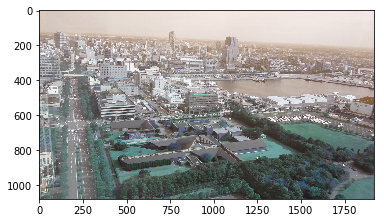

In [2]:
img = cv2.imread('src.JPG')
plt.imshow(img)

Something strange...  
Opencv treats the color space of the image as BGR, but matplotlib treats as RGB.  
So I define the original function for this notebook.

In [3]:
def showClrImg(img):
    dst = np.copy(img)
    dst = cv2.cvtColor(dst, cv2.COLOR_BGR2RGB)
    plt.imshow(dst)

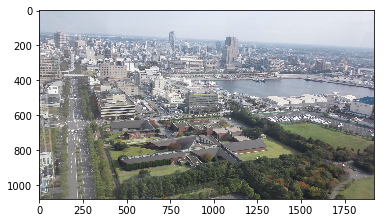

In [4]:
showClrImg(img)

## 4-1 convert intensity and contrast (明るさ・コントラストの変換)
Let's convert images intensity and contrast.

## 4-1-1 tone curve
In order to change the density of the digital image, it is advisable to convert each pixel value of the image with a gradation conversion function.  
Tone curve is graph of gradation conversion function.

In [5]:
# I use sigmoid function as a gradation conversion function
def sigmoid(x):
    return 255 / (1 + np.exp(-0.03*(x-128)) ) + 0.5

In [6]:
x = np.arange(0,256)

In [7]:
fx=sigmoid(x)

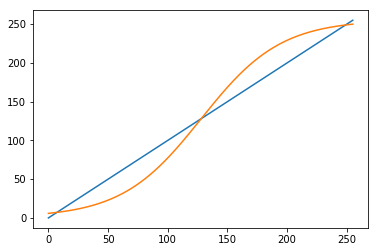

In [8]:
plt.plot(x)
plt.plot(fx)

In [9]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
fGray=sigmoid(gray)

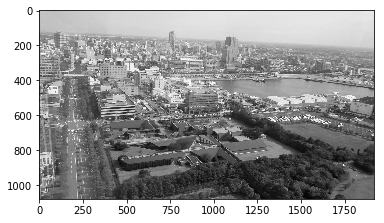

In [10]:
plt.gray()
plt.imshow(gray)

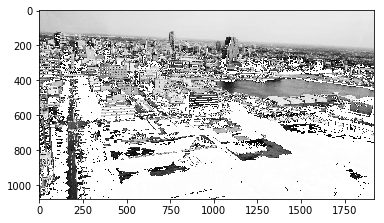

In [11]:
plt.gray()
plt.imshow(fGray.astype(int))

Well, the dark part of the image should be darker, but it is whiter.
Something wrong.

In [12]:
np.min(fGray)

128.0

In [13]:
gray.dtype

dtype('uint8')

Okay.The data type of image is unsigned int.  
But the sigmoid function can be minus.

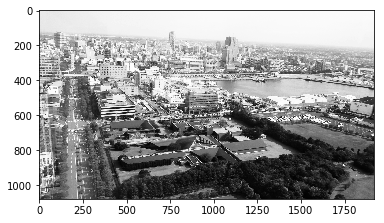

In [14]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
fGray=sigmoid(gray.astype(int))
plt.imshow(fGray.astype(int))

# 4-1-2 Polygonal Tone Curve

In [24]:
def polygonal(x):
    return np.minimum(x*2,255)

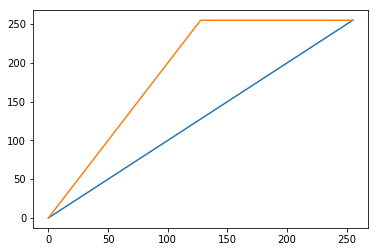

In [25]:
plt.plot(x)
plt.plot(polygonal(x))

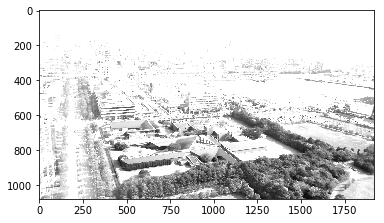

In [26]:
fGray=polygonal(gray.astype(int))
plt.imshow(fGray.astype(int))

## 4-1-3 Exponentiation type curve

In [32]:
def ExpCurve(x):
    return 255*(x/255)**(1/0.5)

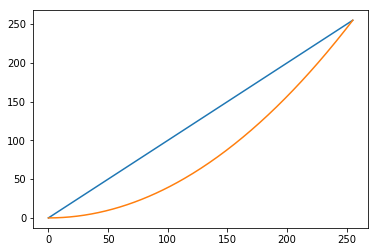

In [33]:
plt.plot(x)
plt.plot(ExpCurve(x))

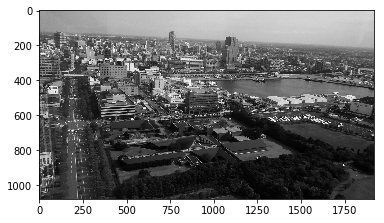

In [34]:
fGray=ExpCurve(gray.astype(int))
plt.imshow(fGray.astype(int))

## 4-1-4 S-curve
Okay,I already implemet this on 4-1-1.I can skip this chapter.

## 4-1-5 Histgram equalization
I have used the tone curve so far to change the density of the image.  
However, what type of tone curve should be used depends on the image.  
Therefore, try to increase the contrast of the image automatically from the histogram of the image.

At first,I calculate the histogram of image.

In [46]:
def calcHistogram(src):
    hist=np.zeros(256)
    im = src.flatten()
    for p in im:
        hist[p]=hist[p]+1
    return hist

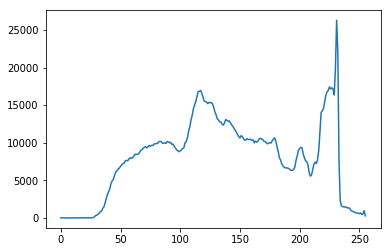

In [52]:
h=calcHistogram(gray)
plt.plot(h)

I'll flatten this histgram.  
So I have to define the tone table for flatten.

In [55]:
def calcFlattenTable(histogram):
    pxNum=sum(histogram)
    scale=pxNum/256
    table=np.zeros_like(histogram)
    total=0
    i=1
    for h in range(len(histogram)):
        total += histogram[h]
        while total > scale*i:
            i=i+1
        table[h]=i-1
    return table

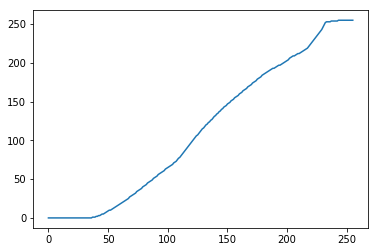

In [56]:
table=calcFlattenTable(h)
plt.plot(table)

In [ ]:
def applyTable(src):
    

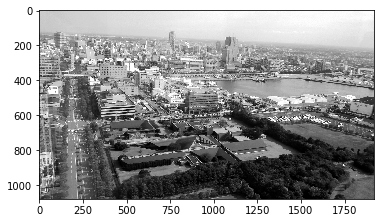

In [57]:
fGray=table[gray.astype(int)]
plt.imshow(fGray.astype(int))

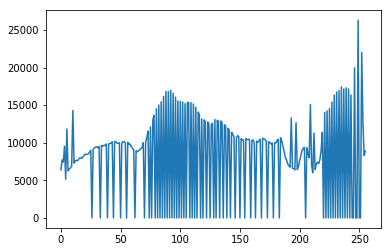

In [61]:
h=calcHistogram(fGray.astype(int))
plt.plot(h)